# Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Importing the dataset

In [42]:
df = pd.read_csv('..\datasets\IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [44]:
df.shape

(15509, 10)

In [45]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [46]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


**Note: Dataset has alot of missing values**

# Drop columns that are not useful for analysis

In [47]:
MovieData = df.drop(columns=['Name', 'Actor 2', 'Actor 3'])
MovieData.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [48]:
MovieData.dropna(inplace=True)

In [49]:
MovieData.drop_duplicates(inplace=True)
MovieData.shape

(5746, 7)

# Handling Columns

In [50]:
MovieData['Year'].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1996)', '(1999)', '(1973)', '(1968)',
       '(1982)', '(1977)', '(1950)', '(1969)', '(1948)', '(1990)',
       '(1989)', '(2001)', '(2000)', '(1953)', '(1978)', '(1963)',
       '(1992)', '(1976)', '(1984)', '(1986)', '(1966)', '(1975)',
       '(1980)', '(1967)', '(1970)', '(1952)', '(1972)', '(1971)',
       '(1964)', '(1954)', '(1962)', '(1957)', '(1965)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [51]:
def filterYear(value):
    value = str(value).strip('()')
    return int(value)

MovieData['Year'] = MovieData['Year'].apply(filterYear)
MovieData['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [52]:
MovieData['Duration'].head()

1    109 min
3    110 min
5    147 min
6    142 min
8     82 min
Name: Duration, dtype: object

In [53]:
def filterDuration(value):
    value=str(value).split(' ')
    value=value[0]
    return int(value)

MovieData['Duration']=MovieData['Duration'].apply(filterDuration)
MovieData['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [54]:
MovieData['Genre'].head(10).unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance'], dtype=object)

In [55]:
def split_genre_column(MovieData,Genre):
   
    MovieData['Genre1'] = MovieData[Genre].str.split(',', expand=True)[0]
    MovieData['Genre2'] = MovieData[Genre].str.split(',', expand=True)[1]
    MovieData['Genre3'] = MovieData[Genre].str.split(',', expand=True)[2]
    return MovieData

split_genre_column(MovieData,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [56]:
print(MovieData['Actor 1'].unique())
print(f'Number of unique actors: ',len(MovieData['Actor 1'].unique()))

['Rasika Dugal' 'Prateik' 'Bobby Deol' ... 'Sadhana Singh'
 'Sunil Sukthankar' 'Darsheel Safary']
Number of unique actors:  2031


In [57]:
MovieData.isna().sum()

Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Genre1         0
Genre2      1717
Genre3      3412
dtype: int64

In [58]:
MovieData = MovieData.fillna(0)
MovieData.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [59]:
G=['Genre1','Genre2','Genre3']
for x in G:
    MovieData[x],_ = pd.factorize(MovieData[x])
    
MovieData = MovieData.drop(columns=['Genre'])
MovieData.head(3)

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1


In [60]:
MovieData['Genre1'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [61]:
MovieData['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [62]:
def filterVotes(value):
    value = str(value).replace(',','')
    return int(value)

MovieData['Votes'] = MovieData['Votes'].apply(filterVotes)
MovieData['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

# Feature Engineering

## Release Year Features

In [63]:
# Add column 'MovieAge' to the dataframe
MovieData['MovieAge'] = 2024 - MovieData['Year']
MovieData.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0,5
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0,5
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1,27
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,0,1,2,19
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3,12


## Director and Actor Popularity

In [64]:
DirectorCounts =MovieData['Director'].value_counts()
print(DirectorCounts)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          33
Hrishikesh Mukherjee    33
                        ..
Manav Kaul               1
Sajeev Balath            1
Sriram Raja              1
Randeep Jha              1
Mozez Singh              1
Name: count, Length: 2489, dtype: int64


In [65]:
ActorCounts= MovieData['Actor 1'].value_counts()
print(ActorCounts)

Actor 1
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
                     ... 
Prakash Mehra           1
Lucky Kohli             1
A.K. Hangal             1
Neera                   1
Darsheel Safary         1
Name: count, Length: 2031, dtype: int64


In [66]:
MovieData['DirectorPopularity']= MovieData['Director'].map(DirectorCounts)

MovieData['ActorPopularity']=MovieData['Actor 1'].map(ActorCounts) 

## Historical Average Ratings

In [67]:
DirectorAvgRating = MovieData.groupby('Director')['Rating'].mean()
MovieData['DirectorAvgRating'] = MovieData['Director'].map(DirectorAvgRating)

ActorAvgRating = MovieData.groupby('Actor 1')['Rating'].mean()
MovieData['ActorAvgRating'] = MovieData['Actor 1'].map(ActorAvgRating)
MovieData.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,DirectorPopularity,ActorPopularity,DirectorAvgRating,ActorAvgRating
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0,5,1,2,7.000000,6.850000
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0,5,1,5,4.400000,5.420000
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1,27,15,18,5.313333,4.788889
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,0,1,2,19,6,20,7.383333,5.435000
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3,12,1,1,5.600000,5.600000


## Scaling Numerical Data

In [68]:
scaled_df = MovieData.copy()
scaler = StandardScaler()
columns = ['Votes', 'Duration', 'MovieAge', 'DirectorPopularity', 'ActorPopularity', 'DirectorAvgRating', 'ActorAvgRating']
scaled_df[columns] = scaler.fit_transform(scaled_df[columns])
scaled_df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,DirectorPopularity,ActorPopularity,DirectorAvgRating,ActorAvgRating
1,2019,-0.918991,7.0,-0.195574,Gaurav Bakshi,Rasika Dugal,0,0,0,-1.143526,-0.741901,-0.702023,0.970496,0.898491
3,2019,-0.880372,4.4,-0.193582,Ovais Khan,Prateik,1,1,0,-1.143526,-0.741901,-0.601009,-1.347831,-0.470679
5,1997,0.548518,4.7,-0.135133,Rahul Rawail,Bobby Deol,1,2,1,-0.027052,1.017681,-0.163282,-0.533445,-1.074944
6,2005,0.355425,7.4,-0.116019,Shoojit Sircar,Jimmy Sheirgill,0,1,2,-0.433043,-0.113479,-0.095939,1.312300,-0.456317
8,2012,-1.961695,5.6,-0.172106,Allyson Patel,Yash Dave,2,3,3,-0.788285,-0.741901,-0.735695,-0.277834,-0.298336


## Drop Columns with Low Correlation

In [71]:
MovieData[columns + ['Rating', 'Genre1', 'Genre2', 'Genre3']].corr()['Rating'].sort_values().to_frame()

,Rating
Genre3,-0.022744
Duration,-0.014573
Genre1,-0.005673
ActorPopularity,-0.000271
Genre2,0.015028
DirectorPopularity,0.030414
Votes,0.139230
MovieAge,0.195289
ActorAvgRating,0.753999
DirectorAvgRating,0.809638


In [70]:
scaled_df.columns

Index(['Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Genre1',
       'Genre2', 'Genre3', 'MovieAge', 'DirectorPopularity', 'ActorPopularity',
       'DirectorAvgRating', 'ActorAvgRating'],
      dtype='object')

In [72]:
coulmnstodrop = ['Year', 'Duration', 'Director', 'Actor 1', 'Genre1',
       'Genre2', 'Genre3', 'ActorPopularity', 'DirectorPopularity']
scaled_df.drop(columns=coulmnstodrop, inplace = True)

In [73]:
scaled_df.head()

,Rating,Votes,MovieAge,DirectorAvgRating,ActorAvgRating
1,7.0,-0.195574,-1.143526,0.970496,0.898491
3,4.4,-0.193582,-1.143526,-1.347831,-0.470679
5,4.7,-0.135133,-0.027052,-0.533445,-1.074944
6,7.4,-0.116019,-0.433043,1.312300,-0.456317
8,5.6,-0.172106,-0.788285,-0.277834,-0.298336


# Visualization

**Note: ActorAvgRating & DirectorAvgRating have the most correlation with the movie rating**

## Director Influence on Ratings

C:\Users\mohamed mowina\AppData\Local\Temp\ipykernel_5952\3326298237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MovieData[MovieData['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='rocket')


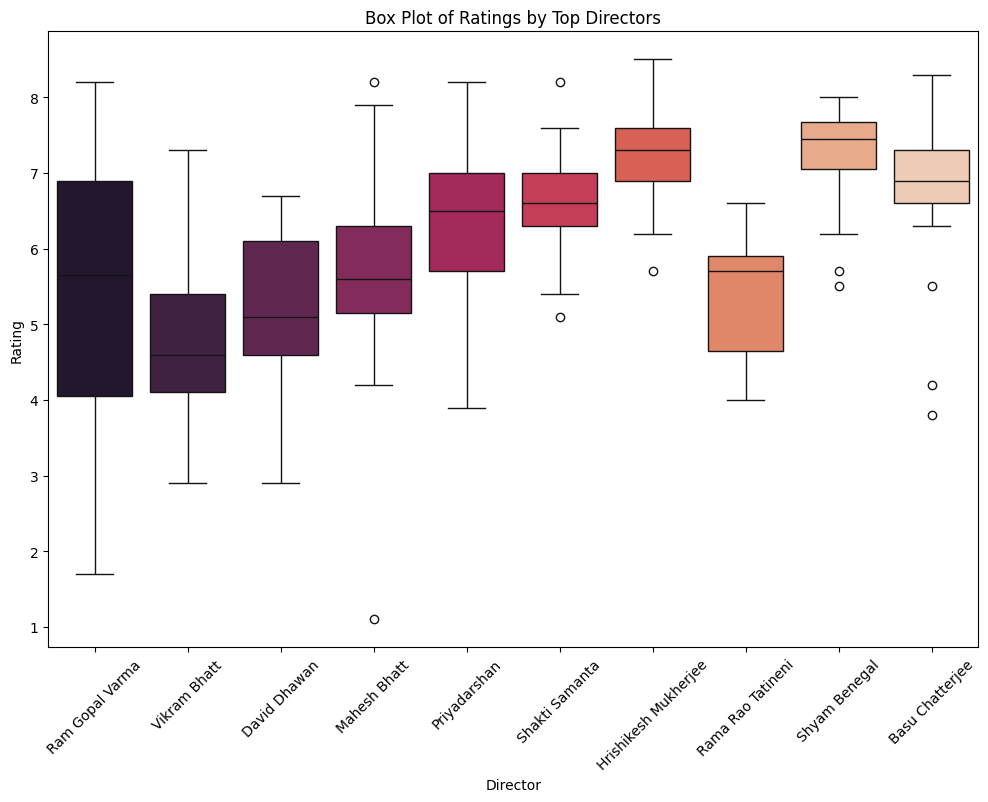

In [ ]:
plt.figure(figsize=(12, 8))
TopDirectors=MovieData['Director'].value_counts().index[0:10]
sns.boxplot(data=MovieData[MovieData['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='rocket')

plt.title('Box Plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

**Notable outliers for the directors**

## Actor Influence on Ratings

C:\Users\mohamed mowina\AppData\Local\Temp\ipykernel_5952\4245012483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MovieData[MovieData['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='mako')


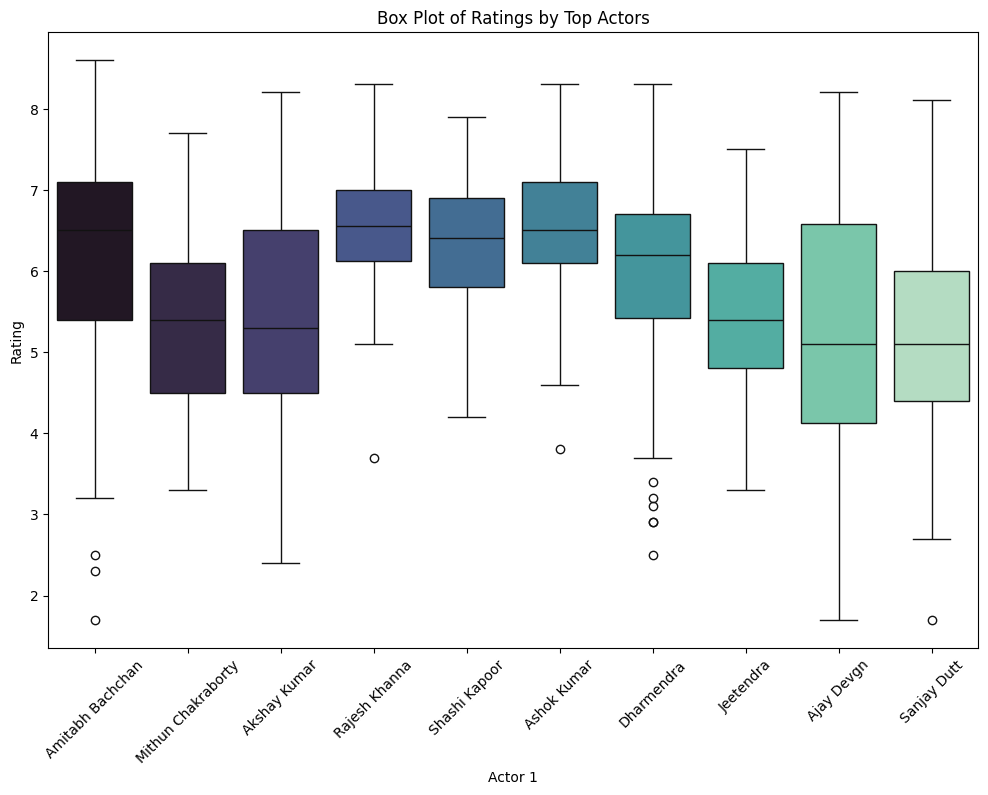

In [ ]:
plt.figure(figsize=(12, 8))
TopActors = MovieData['Actor 1'].value_counts().index[:10]
sns.boxplot(data=MovieData[MovieData['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='mako')

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Building the Model 

## Train-Test Split

In [35]:
scaled_df.columns

Index(['Year', 'Rating', 'Votes', 'Director', 'Actor 1', 'Genre1', 'Genre2',
       'Genre3', 'MovieAge', 'DirectorAvgRating', 'ActorAvgRating'],
      dtype='object')

In [77]:
scaled_df.head()

,Rating,Votes,MovieAge,DirectorAvgRating,ActorAvgRating
1,7.0,-0.195574,-1.143526,0.970496,0.898491
3,4.4,-0.193582,-1.143526,-1.347831,-0.470679
5,4.7,-0.135133,-0.027052,-0.533445,-1.074944
6,7.4,-0.116019,-0.433043,1.312300,-0.456317
8,5.6,-0.172106,-0.788285,-0.277834,-0.298336


In [78]:
X = scaled_df.drop(['Rating'], axis=1)
Y = scaled_df["Rating"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 24)

## Linear Regression

In [81]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test,Y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(Y_test,Y_pred)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE): 0.5583523098907763
R-squared score: 0.71


## Ridge

In [82]:
r = Ridge(alpha=0.1)
r.fit(X_train, Y_train)

r.score(X_test, Y_test)

0.7143271206596487

## Testing Ridge with polynomial features

In [83]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(x_train_poly, Y_train)

ridge.score(x_test_poly, Y_test)

0.72252464741194

**Note: There is a small increase in the accurcy**

## Preform Grid Search to find the best Paremeters

In [88]:
# Create a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Define the parameter grid
param_grid = {
    'poly__degree': [2, 3, 4],
    'ridge__alpha': [0.1, 1.0, 10.0]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'poly__degree': 2, 'ridge__alpha': 10.0}


In [87]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {r2:.2f}')

Mean Squared Error: 0.72
